# 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

In [1]:
# Loading needed libraries

# 1.  Loading packages needed for Arithmetic computation, Dataframe creation and manipulation,
#     and Plotting the statistical plots
# 2.  Importing Logistic regression and sklearn package's data splitting function
# 3.  Importing all necessary packages to calculate the  performance measures,confusion matrix,
#     ROC_AUC_Curve
# 4.  Importing package for Statistical Significance test 
# 5.  Ignore Warnings
# 6.  Standardise the scales

# 1. 
import numpy as np      
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

#2. 
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split 


#3.
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score  
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import confusion_matrix,recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

#4.
import statsmodels.api as sm

#5.
import warnings
warnings.filterwarnings('ignore')

#6.
from sklearn.preprocessing import StandardScaler

In [2]:
# Import the dataset - Reading datafile as Dataframe called Bank
# Creating new copy of Dataframe to perform computation and EDA

Bank = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
Bank_df=Bank.copy()

In [3]:
# Viewing the first 5 rows of dataframe

Bank_df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# Get the column names, number of non-null values and data-type for each column

Bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


 Observations-
 
 1. CCAvg column data type is float64 whereas all other columns are int64
 
 2. Data types for all columns are very appropriate- int/float and no object data type, which signifies probability of having special character('?','*') in any column is 0. Null value is also zero

In [5]:
# Dataframe shape - Get the number of rows and columns available in dataframe

Bank_df.shape

print("Total number of rows ")
print( Bank_df.shape[0])
print("Total number of Columns ")
print( Bank_df.shape[1])

Total number of rows 
5000
Total number of Columns 
14


In [6]:
# check for null value

Bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
# Dataframe statistical summary 

Bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Observations:
1. Min value for experience column is  negative. Data cleansing will be needed
2. Standard deviation for Mortgage is very high. Appears to have outliers. Needs to be validated part of univariate Analysis

In [8]:
# Imputation - Negative values in Experience
# Finding the unique value in Experience and its total count

Bank_df['Experience'].value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

In [9]:
# Total count of records with Experience <0(Negative value )

Bank_df[Bank_df['Experience']<0].Experience.count()

52

Inference: 
1. Professional experience of customers is negative, which is not logical

2. There are 52 records with negative experience

    2.a 33 customers are tagged with experience as -1
    
    2.b 15 customers are tagged with experience as -2
    
    2.c 4 customers are tagged with experience as -3

In [10]:
# Data Cleansing
# Replace the experience<0 with same magnitude and remove the -ve sign

Bank_df['Experience']=Bank_df['Experience'].apply(abs)


In [11]:
# checking if any negative value still exist in Experience

Bank_df[Bank_df['Experience']<0].Experience.count()

0

#  2.EDA: Study the data distribution in each attribute and target variable, share your findings

#### Data Attributes  Summary

1. Target variable - Personal Loan(Variable type: Binary Catgeorical varilable)

2. Independent variable - 13 variables

        2.a Numeric Continuous independent variables - count= 5
             Age, Experience, Income, Mortgage and  CCAvg  
        2.b Ordinal Categorical independent variables - count=2
             Family and Education  
        2.c Nominal Categorical independent varilables - count= 2
             ID, Zip Code
        2.d Binary Categorical independent Variables(0/1) - count= 4
             Securities Account, CD Account, Online, CreditCard

#### 2.a Number of unique value in each column

In [12]:
Bank_df.apply(lambda x: (x.nunique()))

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

#### 2.b Number of people with zero mortgage

In [13]:
# Number of people with zero mortgage

temp1 = str(Bank_df['Mortgage'].value_counts()[0])
print('Number of people with zero Mortgage ='+ temp1)

Number of people with zero Mortgage =3462


Inference - Majority of customers(3462 out of 5000) having Mortgage= 0. Lets perform further analysis, part of Univariate analysis to understand the data spread

#### 2.c Number of people with zero credit card spending per month

In [14]:
# Number of people with zero credit card spending per month

Bank_temp = Bank.copy()
temp2= (Bank_temp['CCAvg'].value_counts()[0.00])
print("Total Number of customers with zero credit card spending per month = ")
print( temp2)

Total Number of customers with zero credit card spending per month = 
106


CCAVg for majority of customers(5000-106=4894)is greater than 0 . Lets explore data spread part of univariate analysis

#### 2.d Value counts of all categorical columns

In [15]:
# Column - Education
# Using value_counts() function to get the total number of customers under each category

c=Bank_df['Education'].value_counts()
print("Total Number of Undergrad customers = "+ str(c[1]))
print("Total Number of Graduate customers = "+ str(c[2]))
print("Total Number of Advanced/Professional customers = "+ str(c[3]))

Total Number of Undergrad customers = 2096
Total Number of Graduate customers = 1403
Total Number of Advanced/Professional customers = 1501


In [16]:
# Column- Personal Loan
# Using value_counts() function to get the total number of customers under each category

c=Bank_df['Personal Loan'].value_counts()
print("Total Number of customers rejected the personal loans offered in the last campaign= "+ str(c[0]))
print("Total Number of customers accepted the personal loans offered in the last campaign= "+ str(c[1]))


Total Number of customers rejected the personal loans offered in the last campaign= 4520
Total Number of customers accepted the personal loans offered in the last campaign= 480


In [17]:
# Column Securities Account
# Using value_counts() function to get the total number of customers under each category

c=Bank_df['Securities Account'].value_counts()
print("Total Number of customers without Securities account = "+ str(c[0]))
print("Total Number of customers with Securities account = "+ str(c[1]))

Total Number of customers without Securities account = 4478
Total Number of customers with Securities account = 522


In [18]:
# Column CD Account
# Using value_counts() function to get the total number of customers under each category

c=Bank_df['CD Account'].value_counts()
print("Total Number of customers without CD account = "+ str(c[0]))
print("Total Number of customers with CD account = "+ str(c[1]))

Total Number of customers without CD account = 4698
Total Number of customers with CD account = 302


In [19]:
# Column Online Account
# Using value_counts() function to get the total number of customers under each category

c=Bank_df['Online'].value_counts()
print("Total Number of customers without Internet Banking = "+ str(c[0]))
print("Total Number of customers with Internet Banking = "+ str(c[1]))

Total Number of customers without Internet Banking = 2016
Total Number of customers with Internet Banking = 2984


In [20]:
# Column CreditCard
# Using value_counts() function to get the total number of customers under each category

c=Bank_df['CreditCard'].value_counts()
print("Total Number of customers without CreditCard = "+ str(c[0]))
print("Total Number of customers with CreditCard = "+ str(c[1]))

Total Number of customers without CreditCard = 3530
Total Number of customers with CreditCard = 1470


In [21]:
# Column Family
# Using value_counts() function to get the total number of customers under each category

c=Bank_df['Family'].value_counts()
print("Total Number of customers with Family size of 1 = "+ str(c[1]))
print("Total Number of customers using Family size of 2 = "+ str(c[2]))
print("Total Number of customers with Family size of 3 = "+ str(c[3]))
print("Total Number of customers using Family size of 4 = "+ str(c[4]))

Total Number of customers with Family size of 1 = 1472
Total Number of customers using Family size of 2 = 1296
Total Number of customers with Family size of 3 = 1010
Total Number of customers using Family size of 4 = 1222


#### 2.e Univariate and Bivariate plots

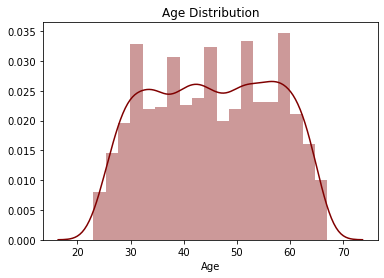

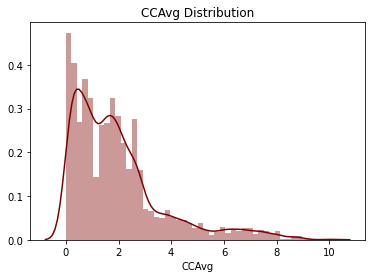

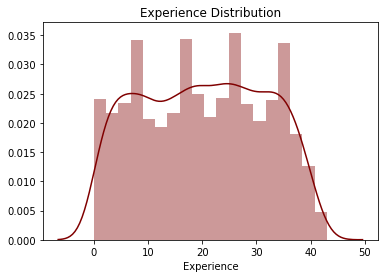

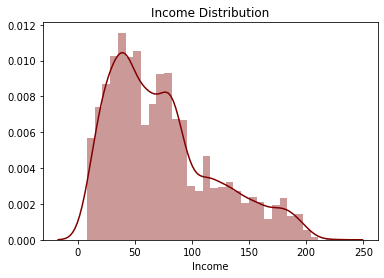

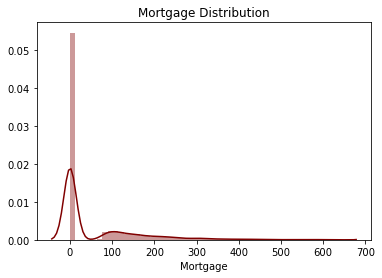

In [22]:
# Ploting histogram for continous columns

for i in ['Age','CCAvg','Experience','Income','Mortgage']:
    sns.distplot(Bank_df[i],color='Maroon')
    plt.title(i+' Distribution')
    plt.show()

Insight from above analysis -

1.Distribution of Income, CCAvg and Mortgage are skewed

2.Age and Experience are almost symmetrical(normally distributed).

3.Mortgage column is more skewed.peak value is nearer to zero since majority of customer having mortgage=0.Min, median for mortgage are 0. however max is 635k. Let's use log transformation on mortgage value and hoping that this should solve the outlier on mortgage

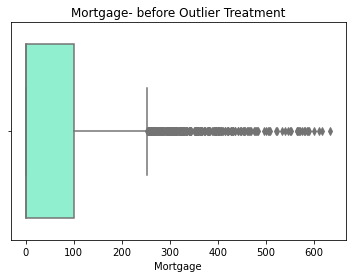

In [23]:
# Box plot for Mortgage before log transformation

sns.boxplot(Bank_df['Mortgage'],color='Aquamarine')
plt.title('Mortgage- before Outlier Treatment')
plt.show()

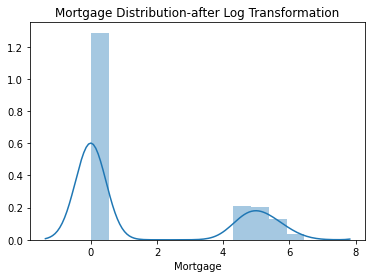

In [24]:
# Mortgage -Log transformation

Bank_df["Mortgage"] = np.log1p(Bank_df["Mortgage"])
sns.distplot(Bank_df["Mortgage"])
plt.title('Mortgage Distribution-after Log Transformation')
plt.show()

Text(0.5, 1.0, 'Mortgage- after outlier treatment')

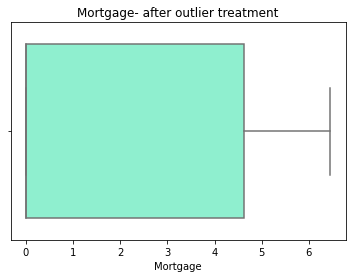

In [25]:
# Box plot for Mortgage after log transformation

sns.boxplot(Bank_df['Mortgage'],color='Aquamarine')
plt.title('Mortgage- after outlier treatment')

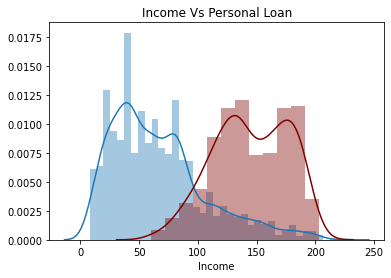

Personal Loan,0,1
Income,,
"(0, 50]",1.000000,0.000000
"(50, 100]",0.977588,0.022412
"(100, 150]",0.714286,0.285714
"(150, 200]",0.495305,0.504695
"(200, 250]",0.812500,0.187500


In [26]:
# Dist Plot for Income attribute and its impact on target variable - Personal Loan

plt.title ('Income Vs Personal Loan')
sns.distplot( Bank_df[Bank_df['Personal Loan'] == 0]['Income'])
sns.distplot( Bank_df[Bank_df['Personal Loan'] == 1]['Income'],color='Maroon')
plt.show()
Income_cut = pd.cut(Bank_df['Income'],bins=[0,50,100,150,200,250])
pd.crosstab(Income_cut,Bank_df['Personal Loan'],normalize='index')

##### Observations -
1. No customer with income < 50,000$ opted for the personal loan 
2. 50% of cutomers with income within the range of 150 to 200 thousand dollars purchased personal loan
3. Customers within range of (100 to 150) and (200 to 250) thousand dollars having 28.57% and 18.75 %

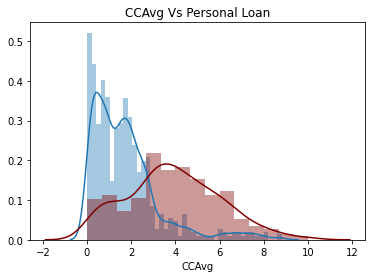

Personal Loan,0,1
CCAvg,,
"(0, 2]",0.969755,0.030245
"(2, 4]",0.864505,0.135495
"(4, 6]",0.530744,0.469256
"(6, 8]",0.693069,0.306931
"(8, 10]",0.641026,0.358974


In [27]:
#Dist Plot for CCAvg attribute and its impact on Personal Loan

plt.title ('CCAvg Vs Personal Loan')
sns.distplot( Bank_df[Bank_df['Personal Loan'] == 0]['CCAvg'])
sns.distplot( Bank_df[Bank_df['Personal Loan'] == 1]['CCAvg'], color='Maroon')
plt.show()

CCAvg_cut = pd.cut(Bank_df['CCAvg'],bins=[0,2,4,6,8,10])
pd.crosstab(CCAvg_cut,Bank_df['Personal Loan'],normalize='index')

Observations:
1. CCAvg shows good correlation with Personal Loan
2. Customers with avg. credit card spending in the range of 4 to 6 thousand dollars shows higher percentage(46.92%) 

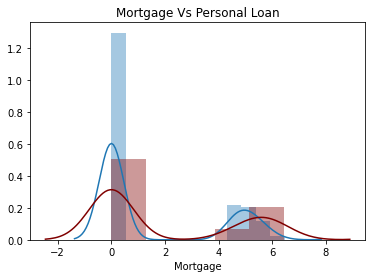

In [28]:
#Dist Plot for Mortgage and its impact on Personal Loan

plt.title ('Mortgage Vs Personal Loan')
sns.distplot( Bank_df[Bank_df['Personal Loan'] == 0]['Mortgage'])
sns.distplot( Bank_df[Bank_df['Personal Loan'] == 1]['Mortgage'],color='Maroon')
plt.show()

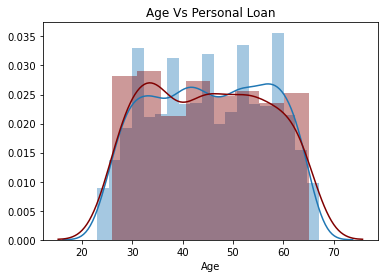

Personal Loan
0    45.367257
1    45.066667
Name: Age, dtype: float64

In [29]:
#Dist Plot for Age and its impact on Personal Loan

plt.title ('Age Vs Personal Loan')
sns.distplot( Bank_df[Bank_df['Personal Loan'] == 0]['Age'])
sns.distplot( Bank_df[Bank_df['Personal Loan'] == 1]['Age'],color='Maroon')
plt.show()
Bank_df.groupby('Personal Loan')['Age'].mean()

For Feature Age - Data distribution is almost symmetric between Age Vs personal Loan(approx.45). Also, Mean and Median are almost equal(Mean=Median=45). 

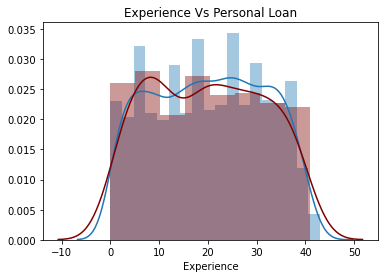

Personal Loan
0    20.165487
1    19.843750
Name: Experience, dtype: float64

In [30]:
#Dist Plot for Experience and its impact on Personal Loan

plt.title ('Experience Vs Personal Loan')
sns.distplot( Bank_df[Bank_df['Personal Loan'] == 0]['Experience'])
sns.distplot( Bank_df[Bank_df['Personal Loan'] == 1]['Experience'],color='Maroon')
plt.show()
Bank_df.groupby('Personal Loan')['Experience'].mean()

For Feature Experience -Data distribution is almost symmetric between Experience Vs personal Loan(approx.20). Also, Mean and Median are almost equal(Mean=Median=20). 

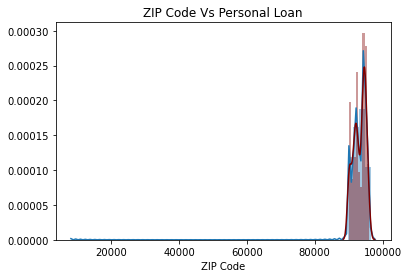

In [31]:
#Dist Plot for Zip Code and its impact on Personal Loan

plt.title ('ZIP Code Vs Personal Loan')
sns.distplot( Bank_df[Bank_df['Personal Loan'] == 0]['ZIP Code'])
sns.distplot( Bank_df[Bank_df['Personal Loan'] == 1]['ZIP Code'],color='Maroon')
plt.show()

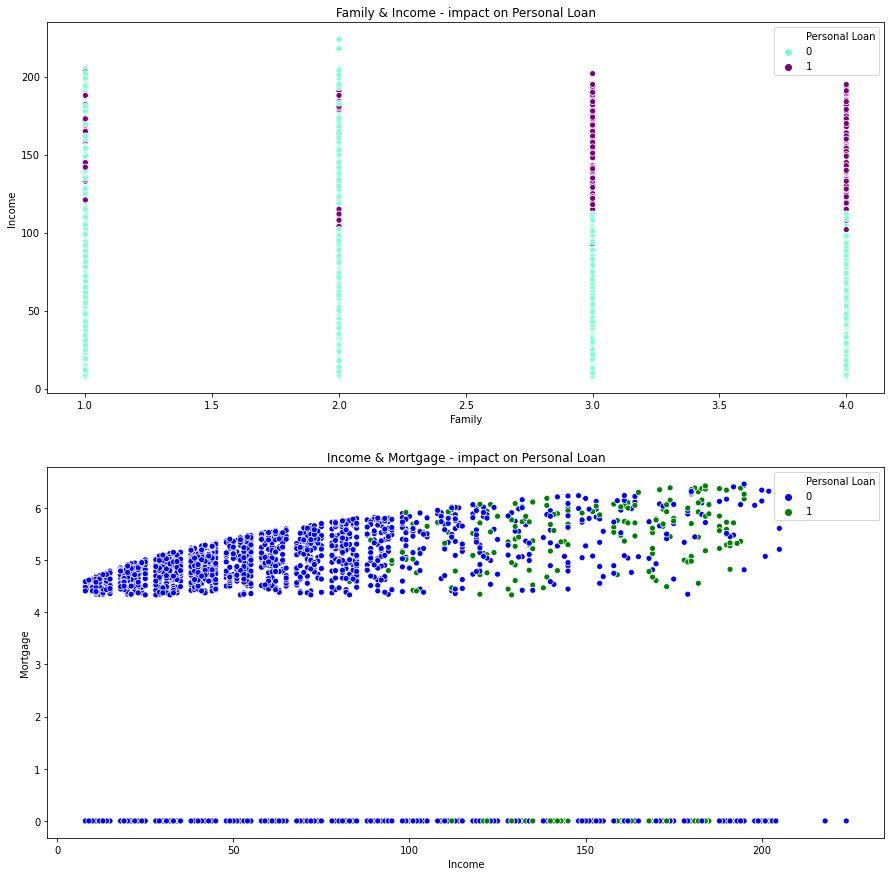

In [32]:
#Influence of other attributes on 'Personal Loan' - Dependant Variable

plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
sns.scatterplot(Bank_df.Family, Bank_df.Income, hue = Bank_df['Personal Loan'], palette= ['Aquamarine','purple'])
plt.title('Family & Income - impact on Personal Loan')
plt.subplot(2,1,2)
sns.scatterplot(Bank_df.Income, Bank_df.Mortgage, hue = Bank_df['Personal Loan'], palette= ['Blue','green'])
plt.title('Income & Mortgage - impact on Personal Loan')
plt.show()

1. Members of family increases (say >=3) the necessity of loan is also increasing.

2. Income increases (approx 100K) the mortgage value also increases gradually wiht the necessity of personal loan.

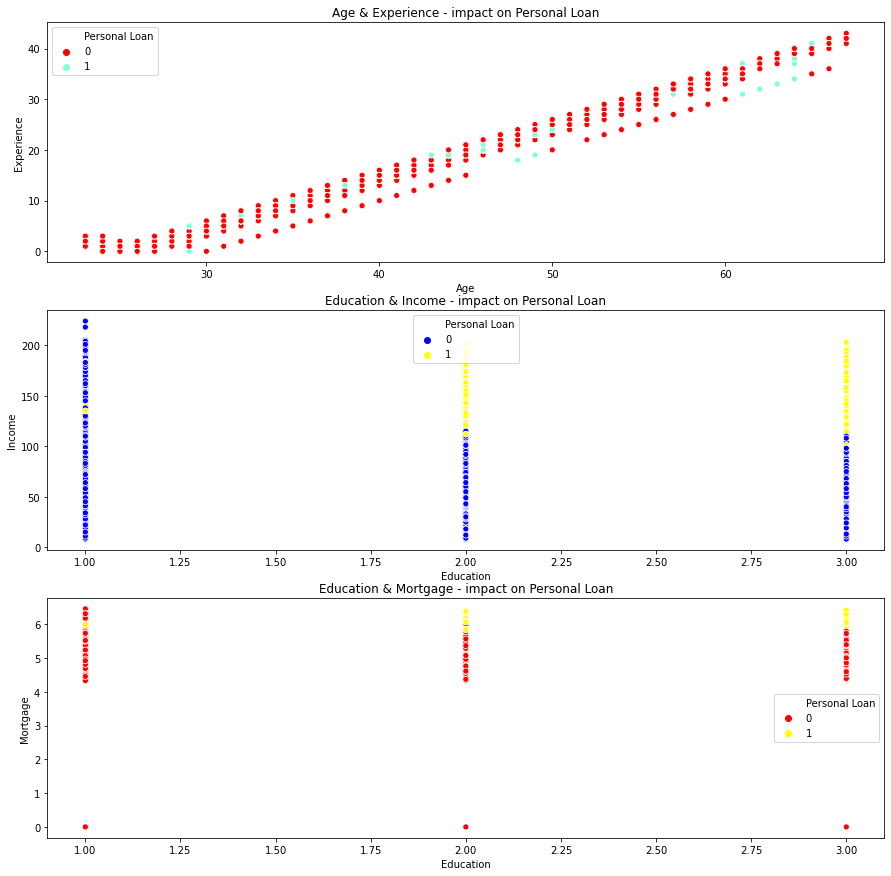

In [33]:

plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(Bank_df.Age, Bank_df.Experience, hue = Bank_df['Personal Loan'], palette= ['Red','Aquamarine'])
plt.title('Age & Experience - impact on Personal Loan')

plt.subplot(3,1,2)
sns.scatterplot(Bank_df.Education, Bank_df.Income, hue = Bank_df['Personal Loan'], palette= ['blue','yellow'])
plt.title('Education & Income - impact on Personal Loan')

plt.subplot(3,1,3)
sns.scatterplot(Bank_df.Education, Bank_df.Mortgage, hue = Bank_df['Personal Loan'], palette= ['Red','yellow'])
plt.title('Education & Mortgage - impact on Personal Loan')

plt.show()

Observation:

1. Age has a very strong association with 'Experience' but nothing gets affected with Personal loan attribute.
2. Customers with education level 2 & 3 seems to take personal loan

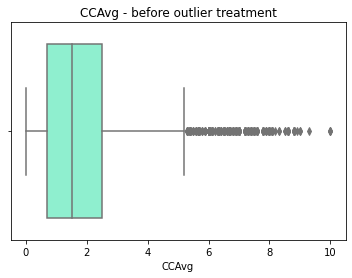

In [34]:
# Outlier check for CCAVg

sns.boxplot(Bank_df['CCAvg'],color='Aquamarine')
plt.title('CCAvg - before outlier treatment')
plt.show()

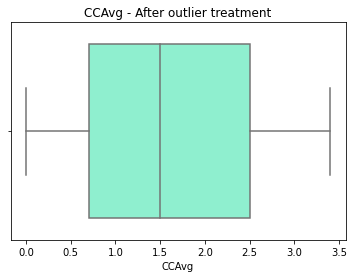

In [35]:
# Fixing the Outliers for Feature -CCAvg
# Calculating the IQR and Whisker and replace all outlier with whisker

Q1 = Bank_df["CCAvg"].quantile(0.25)
Q3 = Bank_df["CCAvg"].quantile(0.75)
IQR = Q3 - Q1
whisker = Q1 + 1.5 * IQR
cust_CCAvg = Bank_df["CCAvg"].apply(lambda x : whisker if x>whisker else x)
Bank_df['CCAvg']=cust_CCAvg
sns.boxplot(Bank_df['CCAvg'],color='Aquamarine')
plt.title('CCAvg - After outlier treatment')
plt.show()

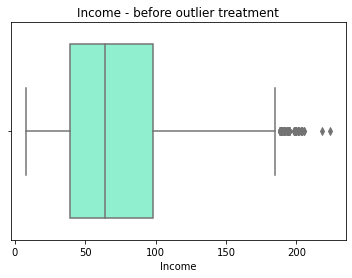

In [36]:
# Outlier check for Income

sns.boxplot(Bank_df['Income'],color='Aquamarine')
plt.title('Income - before outlier treatment')
plt.show()

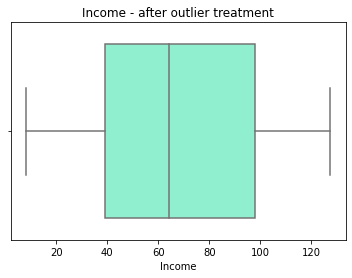

In [37]:
# Fixing the Outliers for Feature -Income
# Calculating the IQR and Whisker and replace all outlier with whisker

Q1 = Bank_df["Income"].quantile(0.25)
Q3 = Bank_df["Income"].quantile(0.75)
IQR = Q3 - Q1
whisker = Q1 + 1.5 * IQR
cust_income = Bank_df["Income"].apply(lambda x : whisker if x>whisker else x)
Bank_df['Income']=cust_income
sns.boxplot(Bank_df['Income'],color='Aquamarine')
plt.title('Income - after outlier treatment')
plt.show()

In [38]:
# Finding Skewness

Bank_df.skew()

ID                     0.000000
Age                   -0.029341
Experience            -0.010038
Income                 0.272504
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  0.252848
Education              0.227093
Mortgage               0.876688
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

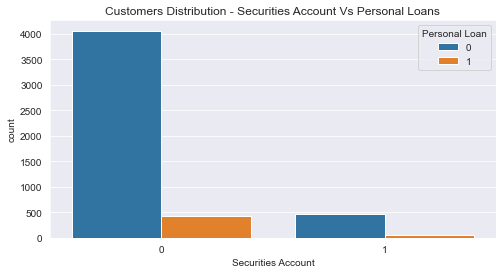

Personal Loan,0,1
Securities Account,,
0,0.906208,0.093792
1,0.885057,0.114943


In [39]:
# EDA - Securities account Vs Personal Loan

plt.figure(figsize=(8,4))
sns.set_style("darkgrid")
plt.title('Customers Distribution - Securities Account Vs Personal Loans')
sns.countplot(Bank_df['Securities Account'],hue=Bank_df['Personal Loan'])
plt.show()
pd.crosstab(Bank_df['Securities Account'],Bank_df['Personal Loan'],normalize='index')

Customers with Securities account have slightly higher percentage(11.49%) of buying the personal loan than the customers with no Securities accout(9.37%)

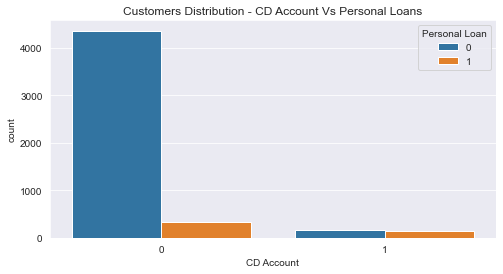

Personal Loan,0,1
CD Account,,
0,0.927629,0.072371
1,0.536424,0.463576


In [40]:
# EDA - CD account Vs Personal Loan

plt.figure(figsize=(8,4))
sns.set_style("darkgrid")
plt.title('Customers Distribution - CD Account Vs Personal Loans')
sns.countplot(Bank_df['CD Account'],hue=Bank_df['Personal Loan'])
plt.show()
pd.crosstab(Bank_df['CD Account'],Bank_df['Personal Loan'],normalize='index')

Customers with CD account have very high percentage (46.35%) of buying the personal loan than the customers with no CD account (7.23%)

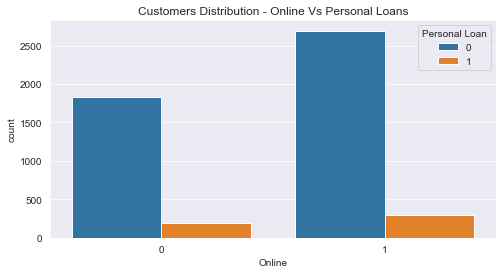

Personal Loan,0,1
Online,,
0,0.90625,0.09375
1,0.90248,0.09752


In [41]:
# EDA - Online account Vs Personal Loan

plt.figure(figsize=(8,4))
sns.set_style("darkgrid")
plt.title('Customers Distribution - Online Vs Personal Loans')
sns.countplot(Bank_df['Online'],hue=Bank_df['Personal Loan'])
plt.show()
pd.crosstab(Bank_df['Online'],Bank_df['Personal Loan'],normalize='index')

No significant diference evident between customer having Online factilities Vs not having online facilities(9.7% vs 9.3%)

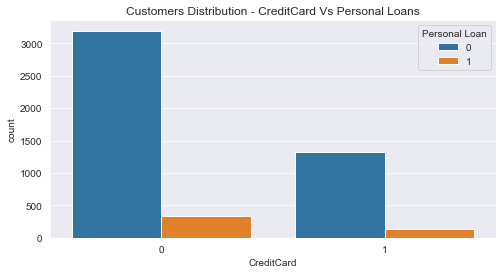

Personal Loan,0,1
CreditCard,,
0,0.904533,0.095467
1,0.902721,0.097279


In [42]:
# EDA - CreditCard Vs Personal Loan
plt.figure(figsize=(8,4))
sns.set_style("darkgrid")
plt.title('Customers Distribution - CreditCard Vs Personal Loans')
sns.countplot(Bank_df['CreditCard'],hue=Bank_df['Personal Loan'])
plt.show()
pd.crosstab(Bank_df['CreditCard'],Bank_df['Personal Loan'],normalize='index')

No significant diference evident between customer having CreditCard Vs not having CreditCard

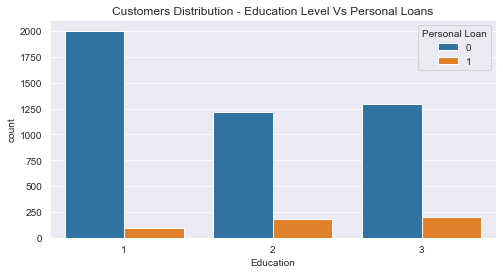

Personal Loan,0,1
Education,,
1,0.955630,0.044370
2,0.870278,0.129722
3,0.863424,0.136576


In [43]:
# EDA - Education Vs Personal Loan

plt.figure(figsize=(8,4))
sns.set_style("darkgrid")
plt.title('Customers Distribution - Education Level Vs Personal Loans')
sns.countplot(Bank_df['Education'],hue=Bank_df['Personal Loan'])
plt.show()
pd.crosstab(Bank['Education'],Bank['Personal Loan'],normalize='index')

Customers with education level 2 "graduate" and level 3 "Advanced/Professional" show a good % -  12.9% and 13.65%

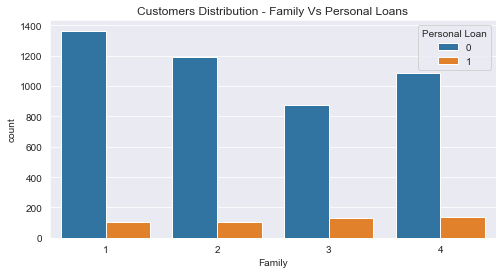

Personal Loan,0,1
Family,,
1,0.927310,0.072690
2,0.918210,0.081790
3,0.868317,0.131683
4,0.890344,0.109656


In [44]:
# EDA - Family Vs Personal Loan

plt.figure(figsize=(8,4))
sns.set_style("darkgrid")
plt.title('Customers Distribution - Family Vs Personal Loans')
sns.countplot(Bank_df['Family'],hue=Bank_df['Personal Loan'])
plt.show()
pd.crosstab(Bank['Family'],Bank['Personal Loan'],normalize='index')

Customer with family size of 3 have higher %  (13.16%)

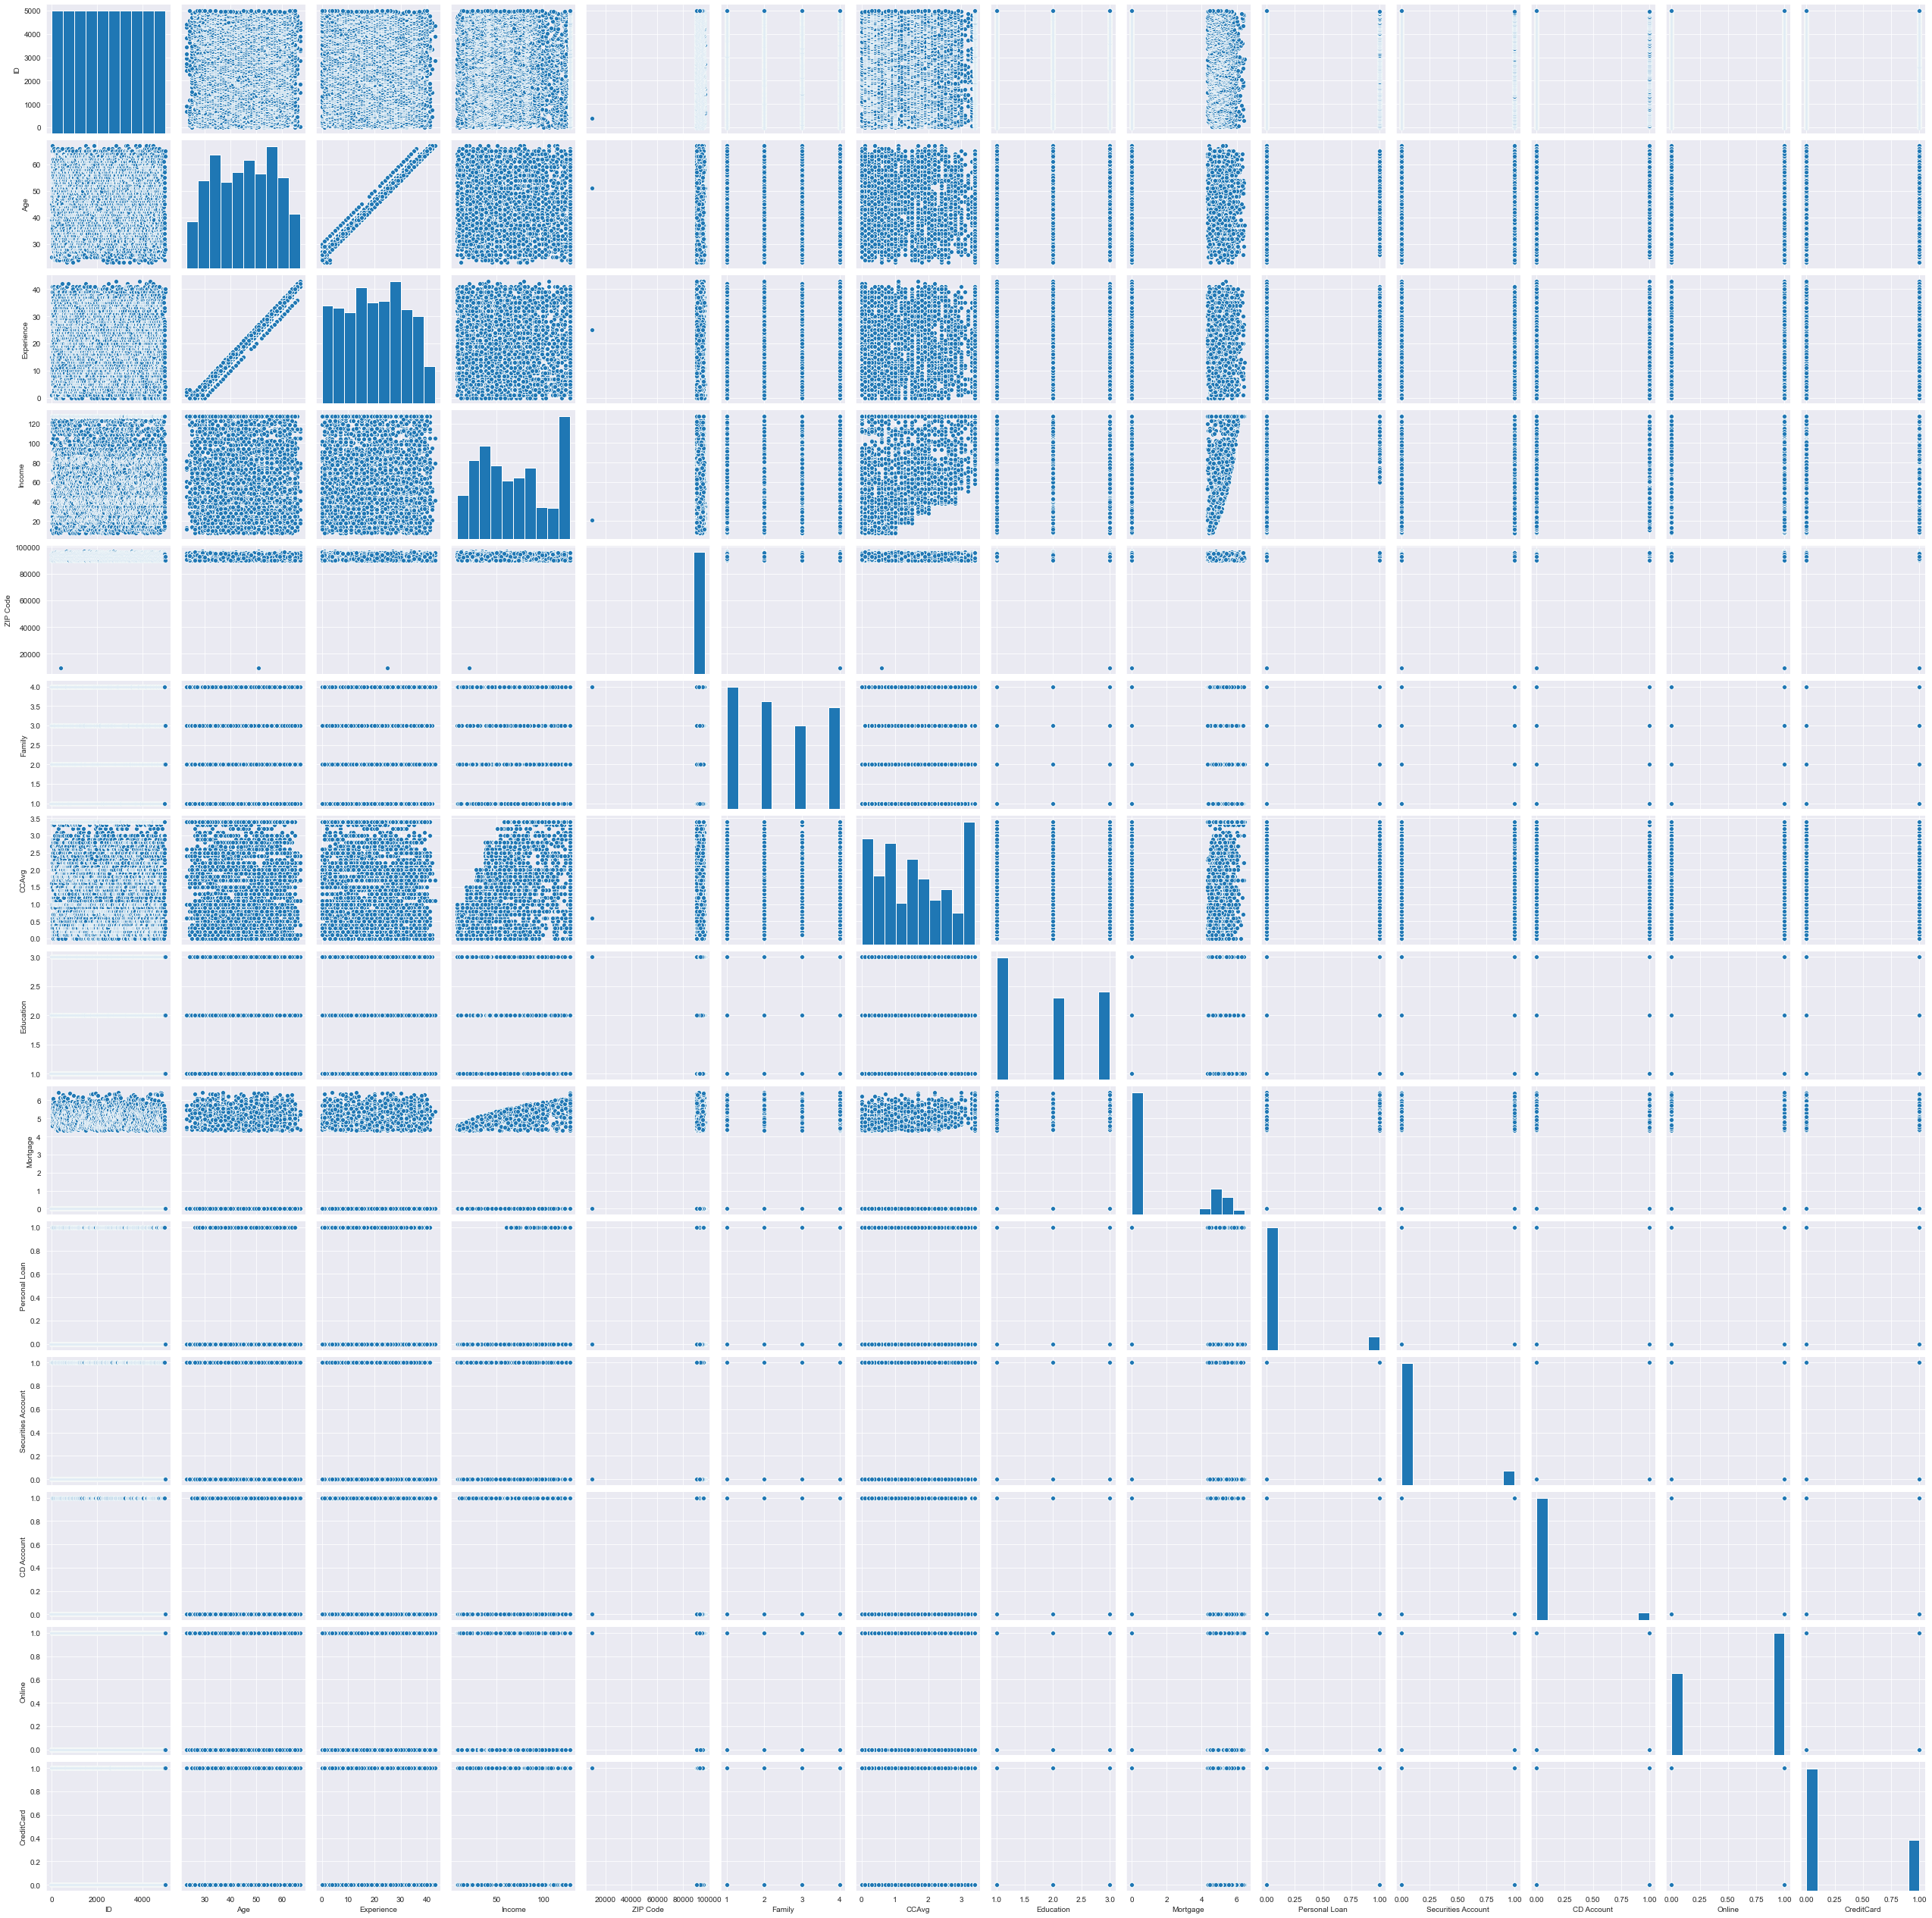

In [45]:
# Bivariate Analysis - Pair plot 

sns.set_style("darkgrid")
sns.pairplot(Bank_df)
plt.show()

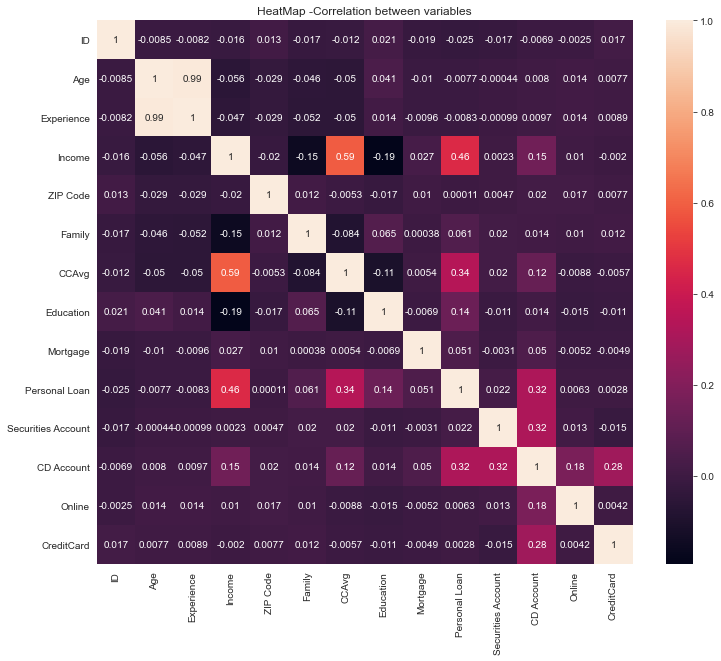

In [46]:
# Heatmap

corr=Bank_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)
plt.title('HeatMap -Correlation between variables')
plt.show()

In [47]:
# Correlation value between Personal Loan Vs all Independent attributes

Bank_df.corr().loc['Personal Loan',:].sort_values(ascending=False)

Personal Loan         1.000000
Income                0.460006
CCAvg                 0.339615
CD Account            0.316355
Education             0.136722
Family                0.061367
Mortgage              0.050963
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIP Code              0.000107
Age                  -0.007726
Experience           -0.008304
ID                   -0.024801
Name: Personal Loan, dtype: float64

### EDA Highlights

####  1. ID and Zip code -

        Both columns are nominal variables and doesn't provide any significant information about customer buying personal loan.Also, Correlation coefficient of both columns are very close to zero. Dropping both column from Final model
        
####  2. Age & Experience-
        
        2.a Age is almost normally distributed(Mean = Median=45)
        2.b Experience is almost normally distributed(Mean=Median=20)
        2.c Age and Experience are highly correlated(positive correlation) with each other and having linear relationship.We can drop either one of this column from final model
        2.d Also, Correlation coefficient of Age and Experience are negative and close to zero.so dropping both columns

#### 3. Income,Mortgage and CCAvg

        3.a Income, Mortgage and CCAvg are not normally distributed(Skewed distribution)
        3.b Income and CCAvg are moderatly correlated with each other
        3.c From Heat map, it is evident that Income and CCAvg have better correlation with Personal loan compared to all other features
        3.d Income increases (approx 100K) the mortgage value also increases gradually with the necessity of personal loan
        3.e Majority of customers(3462 out of 5000) having Mortage=0 and having more ouliers. Fixed the outliers by using log transformation
        3.f CCAvg outliers and Income Outliers are replaced with their whisker

#### 4. Education and Family 

        4.a Members of family increases (say >=3) the necessity of loan is also increasing
        4.b Customer with family size of 3 have higher %  (13.16%)
        4.c Customers with education level 2 & 3 seems to take personal loan

#### 5. Securities Account and CD Account
        
        5.a Customers with CD account have very high percentage (46.3%) of buying the personal loan than the customers with no CD account (7.2%)
        5.b Customers with Securities account have slightly higher percentage(11.49%) of buying the personal loan than the customers with no Securities accout(9.3%)
        
#### 6. Online and CreditCard

        6.a No significant diference evident between customer having Online factilities Vs not having online facilities(9.7% vs 9.3%)
        6.b No significant diference evident between customer having CreditCard Vs not having CreditCard(9.7% vs 9.5%)
        
#### 7. Personal Loan

        7.a Total Number of customers rejected the personal loans offered in the last campaign= 4520
        7.b Total Number of customers accepted the personal loans offered in the last campaign= 480
        7.c Except Income,CCAvg and CD account, No significant correlation evident among other column attributes in dataframe

### 2.e Get data model ready

####  Model Selection - 

     Features to be included
        a. Target Variable (y) = Personal Loan
        b. Independent Variable(x)=:
                i.  Income 
                ii. CCAvg
                iii.CD Account
                iv. Education
                v.  Family
                vi. Securities Account
                Vi. Online
                viii. CreditCard
                ix. Mortgage

         Dropping columns - 
                i.   ID
                ii.  Age
                iii. ZIP Code
                iv. Experience
                v. Personal Loan
                 

In [48]:
# Stastical Significance test for numerical columns

import statsmodels.api as sm
df_num = Bank_df.loc[:,['Personal Loan','Income', 'CCAvg', 'CD Account', 'Mortgage', 'Education', 'Family', 'Securities Account','Experience']]
df_num['intercept'] = 1
log_mod = sm.Logit(df_num['Personal Loan'], df_num[['intercept','Income', 'CCAvg', 'Mortgage', 'Experience']]).fit()

Optimization terminated successfully.
         Current function value: 0.183937
         Iterations 9


In [49]:
log_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4995
Method:                           MLE   Df Model:                            4
Date:                Fri, 09 Oct 2020   Pseudo R-squ.:                  0.4183
Time:                        02:11:43   Log-Likelihood:                -919.68
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                4.040e-285
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -10.1114      0.443    -22.811      0.000     -10.980      -9.243
Income         0.0680      0.004     18.763      0.000       0.061       0.075
CCAvg          0.3624      0.059      6.186      0.000       0.248       0.477
Mortgage       0.0624      0.023      2.764      0.006       0.018       0.107
Experience     0.0053      0.005      1.037      0.300      -0.005       0.015
==============================================================================
"""

In [50]:
# statistical significance of ordinal categorical variables Family and Education
df_ordc = Bank_df.loc[:,['Personal Loan','Family','Education']]
df_ordc['intercept'] = 1
log_mod = sm.Logit(df_ordc['Personal Loan'], df_ordc[['intercept', 'Family', 'Education']]).fit()

Optimization terminated successfully.
         Current function value: 0.305406
         Iterations 7


In [51]:
log_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4997
Method:                           MLE   Df Model:                            2
Date:                Fri, 09 Oct 2020   Pseudo R-squ.:                 0.03415
Time:                        02:11:43   Log-Likelihood:                -1527.0
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                 3.575e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.7670      0.175    -21.574      0.000      -4.109      -3.425
Family         0.1623      0.042      3.863      0.000       0.080       0.245
Education      0.5487      0.059      9.260      0.000       0.433       0.665
==============================================================================
"""

In [52]:
# statistical significance test of Binary categorical variables
df_bc = Bank_df.loc[:,['Personal Loan','CD Account','Securities Account','Online','CreditCard']]
df_bc['intercept'] = 1
log_mod = sm.Logit(df_bc['Personal Loan'], df_bc[['intercept', 'CD Account','Securities Account','Online','CreditCard']]).fit()



Optimization terminated successfully.
         Current function value: 0.273620
         Iterations 7


In [53]:
log_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4995
Method:                           MLE   Df Model:                            4
Date:                Fri, 09 Oct 2020   Pseudo R-squ.:                  0.1347
Time:                        02:11:43   Log-Likelihood:                -1368.1
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                 7.257e-91
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept             -1.9991      0.081    -24.581      0.000      -2.159      -1.840
CD Account             3.8738      0.206     18.780      0.000       3.470       4.278
Securities Account    -1.3318      0.201     -6.621      0.000      -1.726      -0.938
Online                -0.5107      0.111     -4.598      0.000      -0.728      -0.293
CreditCard            -1.1518      0.153     -7.508      0.000      -1.452      -0.851
======================================================================================
"""

Insight from Statistical Significance Summary : 

1. P-Value is less than 0.05  for features: Income, CCAvg,Family,Education,CD Account,Securities Account, Online, CreditCard

2. P-Value is greater than 0.05 for features: Experience

From this, Statistically it is confirmed that we have identified the right features for the final model

In [54]:
# Logistic Regression Model

# Target Variable: Personal Loan
# Indepedent Variable: Income, CCAvg, CD Account, Education, Family,Mortgage,Securities Account,Online,CreditCard
# Dropping columns: ID, Age, ZIP Code, Experience, Personal Loan   
# Print the column names, number of non-null values and data-type of both  target and dependent varialble


y = Bank_df[['Personal Loan']]
X =Bank_df.drop(['ID','ZIP Code','Age','Experience','Personal Loan'], axis =1 )

print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Income              5000 non-null   float64
 1   Family              5000 non-null   int64  
 2   CCAvg               5000 non-null   float64
 3   Education           5000 non-null   int64  
 4   Mortgage            5000 non-null   float64
 5   Securities Account  5000 non-null   int64  
 6   CD Account          5000 non-null   int64  
 7   Online              5000 non-null   int64  
 8   CreditCard          5000 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 351.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Personal Loan  5000 non-null   int64
dtypes: int64(1)
memory usage: 39.2 KB
None


# 3. Split the data into training and test set in the ratio of 70:30 respectively 

In [55]:
# split the data into training and testing set-70% Vs 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 25 )
X_train.head()

,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1023,109.0,1,3.4,1,5.905362,0,0,1,0
2435,102.0,4,2.2,2,0.000000,0,0,1,0
3723,45.0,1,1.6,2,4.418841,0,0,1,0
1173,35.0,2,1.7,2,0.000000,0,0,0,0
2263,28.0,3,1.5,1,0.000000,0,0,1,0


In [56]:
# % data in Training set and Test set

print("Logistic Regression Model-1:Data split % in training set and test set")
print("")
print("{0:0.2f}% data is in training set".format((len(X_train)/len(Bank_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(Bank_df.index)) * 100))
print("")



Logistic Regression Model-1:Data split % in training set and test set

70.00% data is in training set
30.00% data is in test set



In [57]:
# Data distribution % on Personal Loan
print('Logistic Regression Model')
print("")
print('Training set')
print("")
print(y_train['Personal Loan'].value_counts()/ len(y_train)*100)
print("")
print('Test set')
print("")
print(y_test['Personal Loan'].value_counts()/ len(y_test)*100)
print("")

Logistic Regression Model

Training set

0    89.942857
1    10.057143
Name: Personal Loan, dtype: float64

Test set

0    91.466667
1     8.533333
Name: Personal Loan, dtype: float64



# 4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix

In [58]:
# Scale standardisation

from sklearn import preprocessing
columns_name=Bank_df.columns
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [59]:
# create model using constructor
LogRegModel = LogisticRegression()

# fit the model to training set
LogRegModel.fit(X_train_scaled,y_train)

# Train Model Score
Train_Model_Score =LogRegModel.score(X_train_scaled, y_train)
print("Training Model Score ")
print(Train_Model_Score)



Training Model Score 
0.962


In [60]:
# y_Predict and Test Model Score

y_pred = LogRegModel.predict(X_test_scaled)

# Test Model Score
Test_Model_Score = LogRegModel.score(X_test_scaled, y_test)
print("Test Model score:")
print(Test_Model_Score)

Test Model score:
0.9726666666666667


In [61]:
# Performance Measures

# get accuracy of model
lr_acc_score = accuracy_score(y_test,y_pred)
# get F1-score of model
lr_f1_score = f1_score(y_test,y_pred) 
# get the confusion matrix
lr_confmat = confusion_matrix(y_test,y_pred)
# get the classification report
lr_classrep = classification_report(y_test,y_pred)

roc_auc_score=roc_auc_score(y_test, y_pred)


print("Accuracy of model is {} %".format(lr_acc_score*100))
print()
print("Recall of model is %:",recall_score(y_test,y_pred)*100)
print()
print("Precision of model is  %:",precision_score(y_test,y_pred)*100)
print()
print("f1-score of model is {} %".format(lr_f1_score*100))
print()
print("roc_auc_score of Logistic Regression model-1 is {} %".format(roc_auc_score*100))
print()
print("Confusion Matrix of Logistic Regression model is: \n",lr_confmat)
print()
print("Detailed classification report for Logistic Regression model is: \n",lr_classrep)

Accuracy of model is 97.26666666666667 %

Recall of model is %: 72.65625

Precision of model is  %: 93.93939393939394

f1-score of model is 81.93832599118943 %

roc_auc_score of Logistic Regression model-1 is 86.10946610787171 %

Confusion Matrix of Logistic Regression model is: 
 [[1366    6]
 [  35   93]]

Detailed classification report for Logistic Regression model is: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1372
           1       0.94      0.73      0.82       128

    accuracy                           0.97      1500
   macro avg       0.96      0.86      0.90      1500
weighted avg       0.97      0.97      0.97      1500



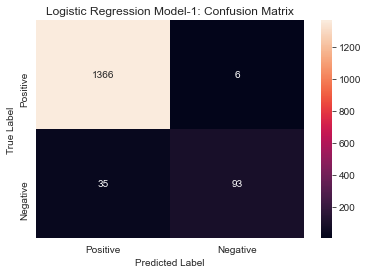

In [62]:
# Confusion Matrix -Heat Map

cm=metrics.confusion_matrix(y_test, y_pred)
class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Logistic Regression Model-1: Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Total number of False Positive and False Negative = 41

Total number of True Positive = 1366

Total number of True Negative = 93

# 5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class

In [63]:
# Coefficient of attributes 

coef_df = pd.DataFrame(LogRegModel.coef_,columns=list(X_train.columns))
coef_df['intercept'] = LogRegModel.intercept_
coef_df

,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,intercept
0,4.27337,0.812462,0.565934,1.624725,0.177167,-0.319107,0.850429,-0.302867,-0.58076,-6.889392


In [64]:
# Observe the predicted and observed classes in a dataframe.
# Copying the x_test dataframe  and add two new columns  to store y_test and y_pred
# Get the rows where predicted class is not equal to observed class
# shape[0] of new dataset is equal to total number of Predicted not equal to Observed

z=X_test.copy()
z['Predicted Personal Loan'] = y_pred
z['Observed Personal Loan'] = y_test

PredVsObs= z[~(z['Predicted Personal Loan']==z['Observed Personal Loan'])]
print("Model: Total number of Predicted not equal to Observed(Number of False Positive + Number of False Negative) = "+str(PredVsObs.shape[0]))

Model: Total number of Predicted not equal to Observed(Number of False Positive + Number of False Negative) = 41


In [65]:
# Displaying Predicted Vs Observed dataframe 

PredVsObs


,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Predicted Personal Loan,Observed Personal Loan
1161,127.5,3,1.40,1,0.000000,0,0,0,0,0,1
4652,127.5,3,3.40,1,0.000000,0,0,1,0,0,1
3754,112.0,4,2.40,3,0.000000,0,0,1,1,1,0
2315,127.5,2,1.40,2,0.000000,0,0,1,0,0,1
1616,84.0,4,3.10,2,0.000000,1,1,1,0,0,1
975,83.0,2,3.40,1,0.000000,0,0,0,0,0,1
3959,123.0,3,1.30,1,0.000000,0,0,1,0,0,1
3742,127.5,1,3.40,1,0.000000,0,1,1,1,1,0
2304,127.5,3,3.40,1,0.000000,0,0,1,0,0,1
1177,71.0,1,3.30,2,5.010635,1,1,1,0,0,1


# 6. Give conclusion related to the Business understanding of your model

The aim of the Thera Bank is to convert the liability customers into loan customers.

A bank wants a new marketing campaign; so that they need information about the correlation between the variables given in the dataset.

The accuracy is not better performance measure here since data distribution between loan buyer vs non-buyer is not symmetrical.

In order to minimize the cost of campaigning for the bank, a best classification algorithm in this context, should minimize both false positives (FP) as well as false negatives (FN).
i.e., The best algorithm should have better Accuracy and F1-Score 

Model Performance measures -

Accuracy of Logistic Regression model is approx. 97 %

f1-score of Logistic Regression model is approx. 82 %

Total number of False Positive and False Negative  = 41

Total number of True Positive = 1366

Total number of True Negative = 93



